In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from community import community_louvain
import plotly.graph_objs as go
import plotly.offline as py
from networkx.algorithms.community import greedy_modularity_communities

ModuleNotFoundError: No module named 'community'

In [ ]:
df_node = pd.read_csv('https://raw.githubusercontent.com/michelepasqualini/Project_DataScience/main/networkx/musae_PTBR_target.csv')
df_edge = pd.read_csv('https://raw.githubusercontent.com/michelepasqualini/Project_DataScience/main/networkx/musae_PTBR_edges.csv')



Data visualization


In [ ]:
df_node

,id,days,mature,views,partner,new_id
0,44891403,1943,False,929459,True,1706
1,61180621,1633,False,11194,False,1273
2,145109685,632,False,2850,False,313
3,122121521,906,True,3422,False,1570
4,189445819,267,False,71,False,800
...,...,...,...,...,...,...
1907,36208929,2199,True,3870,False,699
1908,35856620,2233,False,563412,True,109
1909,106353597,1066,False,130221,True,769
1910,58115154,1684,False,698715,True,504


In [ ]:
labels = ['Non partner','Partner']
colors = ['#1e90ff', '#E1396C']
gender = df_node['partner'].value_counts()
values = list(gender.values)

trace = go.Pie(labels=labels, values=values,hoverinfo='label+percent',marker=dict(colors=colors,line=dict(color='#000000', width=2)))



py.iplot([trace], filename='partner_chart')

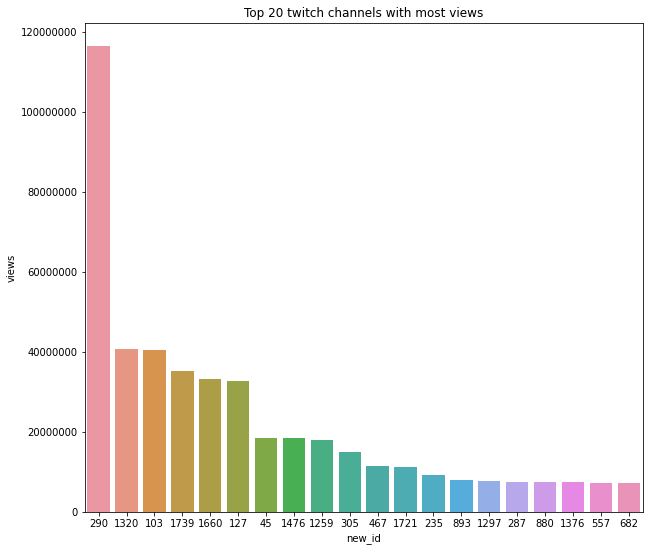

In [ ]:
df=df_node.sort_values(by='views',ascending=False)[0:20]
plt.figure(figsize=(10,9))
sns.barplot(data=df,x='new_id',y='views',  order=df['new_id'])
plt.title("Top 20 twitch channels with most views")
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
plt.show()

In [ ]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

def get_keys_from_value(d, val):
    
    return [k for k, v in d.items() if v == val]

In [ ]:
graph = nx.Graph()
graph.add_nodes_from(df_node)
graph = nx.from_pandas_edgelist(df_edge, 'from', 'to')

### Descrizione del grafo

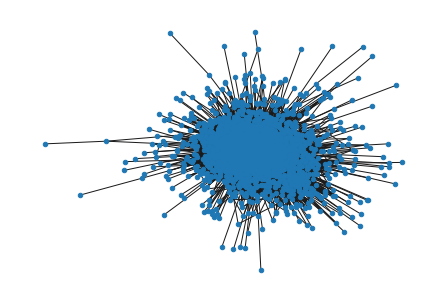

In [ ]:
nx.draw(graph,node_size=20)

In [ ]:
print("NODI: ",len(graph.nodes))
print("ARCHI: ", graph.number_of_edges())
print("DENSITA': ", nx.density(graph))
print("CLUSTERING: ", nx.average_clustering(graph))
print("È CONNESSO: ", nx.is_connected(graph))
print("COMPONENTI CONNESSE: ", nx.number_connected_components(graph))
radius = nx.radius(graph)
print('RAGGIO: ', radius)
diameter = nx.diameter(graph)
print('DIAMETRO: ', diameter)
periphery = nx.periphery(graph)
print('PERIFERIA: ', periphery)
center = nx.center(graph)
print('CENTRO: ', center)

NODI:  1912
ARCHI:  31299
DENSITA':  0.017132150575067492
CLUSTERING:  0.3198952746693515
È CONNESSO:  True
COMPONENTI CONNESSE:  1
RAGGIO:  4
DIAMETRO:  7
PERIFERIA:  [667, 1832]
CENTRO:  [428, 689, 1666, 2, 287, 289, 530, 291, 267, 1177, 923, 417, 656, 1365, 1025, 866, 608, 249, 127, 318, 1389, 260, 1720, 36, 398, 1193, 1287, 298, 1241, 471, 1422, 1194, 290, 67, 1557, 1142, 422, 1304, 928, 467, 1502, 1311, 1758, 1259, 1297, 669, 496, 455, 557, 1344, 880, 1320, 35, 1829, 1014, 504, 1543, 628, 814, 1593, 103, 637, 1660, 59, 1476, 1787, 369, 499, 896, 982, 677, 717, 1721, 864, 1763, 654, 1137, 358, 589, 1249, 661, 188, 1157, 1739, 1821, 315, 560, 441, 726, 806, 176, 1232, 1414, 1337, 488, 148, 751, 139, 195, 601, 11, 777, 391, 869, 817, 784, 1408, 95, 604, 1256, 1441, 1260, 1140, 1494, 1726, 984, 868, 1608, 110, 116, 472, 409, 996, 1541, 432, 1370, 738, 1374, 1533, 682, 1711, 1166, 513, 1687, 341, 340, 1673, 565, 1896, 781, 205, 630, 1280, 514, 1185, 114, 1196, 732, 265, 1841, 1614, 645

In [ ]:
sns.set(style = 'whitegrid')
def plot_metric_bar_chart(metric, title='', ylabel=''):
    x = []
    x_pos =[]
    values = []
    for i,e in enumerate(metric):
        x_pos.append(i)
        x.append(e[0])
        values.append(e[1])
    plt.figure(figsize=(15, 5))
    plt.rc('font', size=12)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.bar(x_pos, values, color='#e24a33')
    plt.xticks(x_pos, x, rotation=45, ha='right')
    plt.show()
    return

## Centrality

#### Degree Centrality

Best 10 Degree Centrality:

1. 127: 0.4013605442176871
2. 1476: 0.3129251700680272
3. 290: 0.3087388801674516
4. 1297: 0.30716902145473574
5. 467: 0.304552590266876
6. 1660: 0.24856096284667714
7. 67: 0.23757195185766616
8. 1320: 0.217687074829932
9. 1758: 0.20617477760334904
10. 1259: 0.20146520146520147

Worst 10 Degree Centrality:

1. 532: 0.0005232862375719519
2. 1828: 0.0005232862375719519
3. 1672: 0.0005232862375719519
4. 1468: 0.0005232862375719519
5. 1857: 0.0005232862375719519
6. 1116: 0.0005232862375719519
7. 1564: 0.0005232862375719519
8. 1519: 0.0005232862375719519
9. 1343: 0.0005232862375719519
10. 1658: 0.0005232862375719519



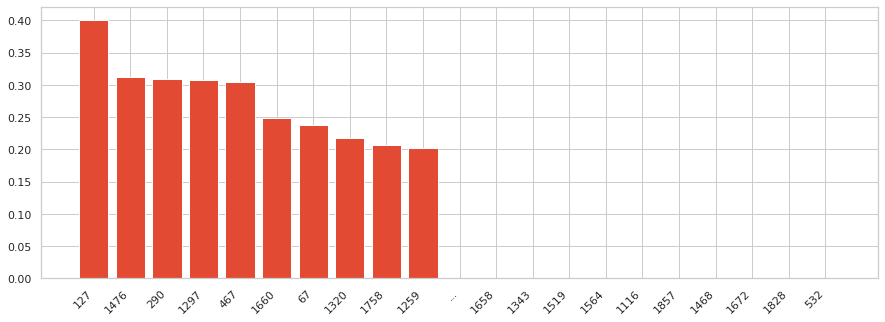

In [ ]:
degree_centrality = nx.degree_centrality(graph)
sorted_dc = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Degree Centrality:\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_dc[i][0])+': '+str(sorted_dc[i][1]))
print('')
print('\033[1m'+'Worst 10 Degree Centrality:\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_dc[i][0])+': '+str(sorted_dc[i][1]))
print('')
plot_metric_bar_chart(sorted_dc[:10]+[('...',0)]+sorted_dc[-10:])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



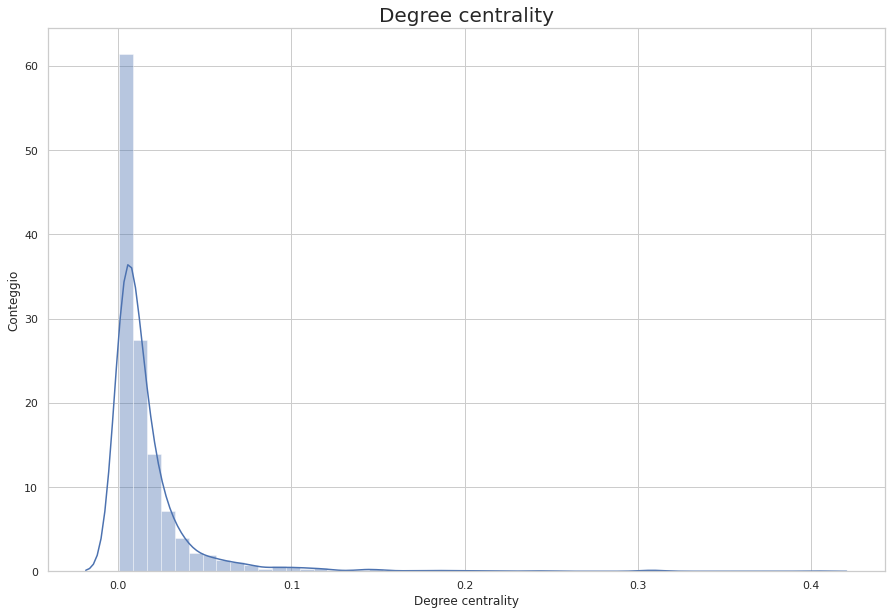

In [ ]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
plt.title('Degree centrality', fontsize = 20)
plt.xlabel('Degree centrality')
plt.ylabel('Conteggio')
sns.distplot(list(degree.values()), kde=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.



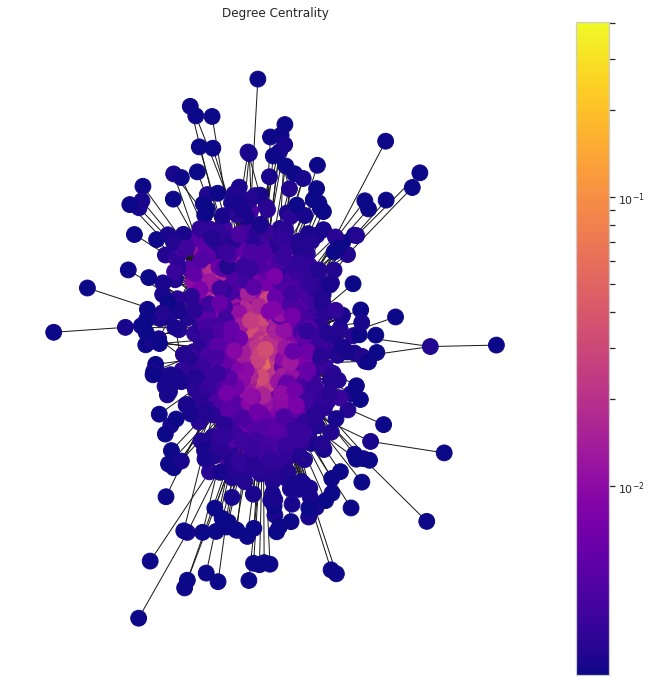

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

#### Closeness Centrality

Best 10 Closeness Centrality:

1. 127: 0.6009433962264151
2. 1297: 0.5684116597263533
3. 467: 0.565050266114725
4. 290: 0.5595900439238654
5. 1476: 0.5594262295081968
6. 67: 0.5435153583617748
7. 1660: 0.5416666666666666
8. 1593: 0.5295095594347464
9. 1259: 0.5237051246916964
10. 287: 0.5227024070021882

Worst 10 Closeness Centrality:

1. 1832: 0.20484510665666203
2. 667: 0.23810117119362073
3. 770: 0.24043784599899345
4. 196: 0.24043784599899345
5. 1672: 0.24260505268503238
6. 1794: 0.24658064516129033
7. 1032: 0.25197784810126583
8. 1044: 0.2532467532467532
9. 1222: 0.2541899441340782
10. 1070: 0.2549019607843137



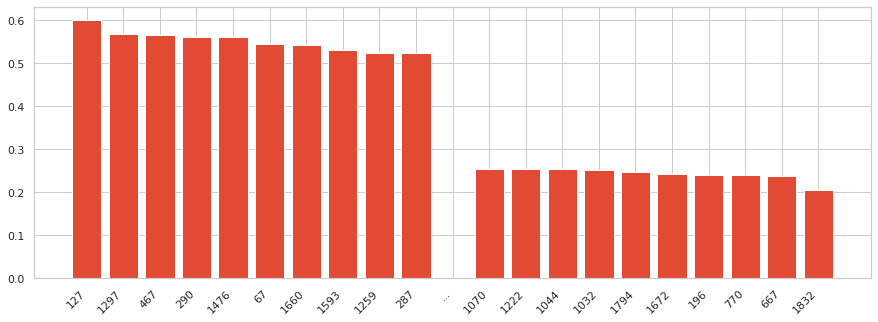

In [ ]:
closeness_centrality = nx.closeness_centrality(graph)
sorted_cc = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Closeness Centrality:\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_cc[i][0])+': '+str(sorted_cc[i][1]))
print('')
print('\033[1m'+'Worst 10 Closeness Centrality:\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_cc[i][0])+': '+str(sorted_cc[i][1]))
print('')
plot_metric_bar_chart(sorted_cc[:10]+[('...',0)]+sorted_cc[-10:])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



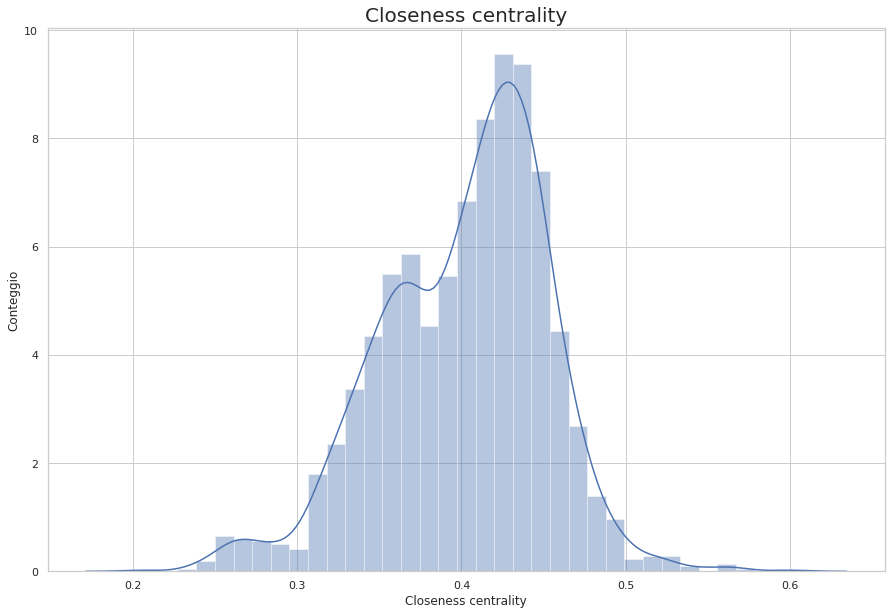

In [ ]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
plt.title('Closeness centrality', fontsize = 20)
plt.xlabel('Closeness centrality')
plt.ylabel('Conteggio')
sns.distplot(list(clos.values()), kde=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.



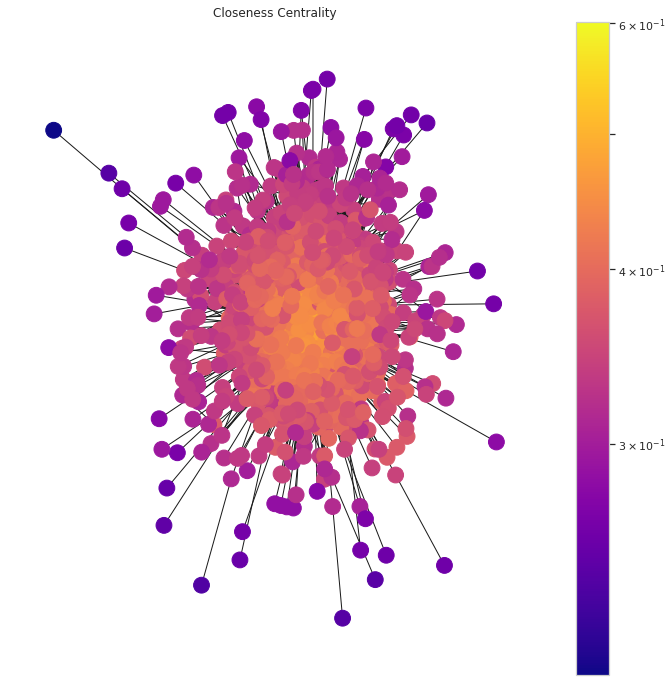

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

#### Betweenness Centrality

Best 10 Betweenness Centrality:

1. 127: 0.0992613670254655
2. 1476: 0.054894872658417665
3. 1297: 0.05042095543765276
4. 290: 0.05011201385679391
5. 467: 0.04382473622801392
6. 67: 0.034425706705748176
7. 1660: 0.02624664025473586
8. 1259: 0.023294665516722747
9. 287: 0.022120764244835684
10. 428: 0.021980008718637752

Worst 10 Betweenness Centrality:

1. 532: 0.0
2. 1828: 0.0
3. 1672: 0.0
4. 1468: 0.0
5. 1857: 0.0
6. 1116: 0.0
7. 1771: 0.0
8. 1564: 0.0
9. 1519: 0.0
10. 1343: 0.0



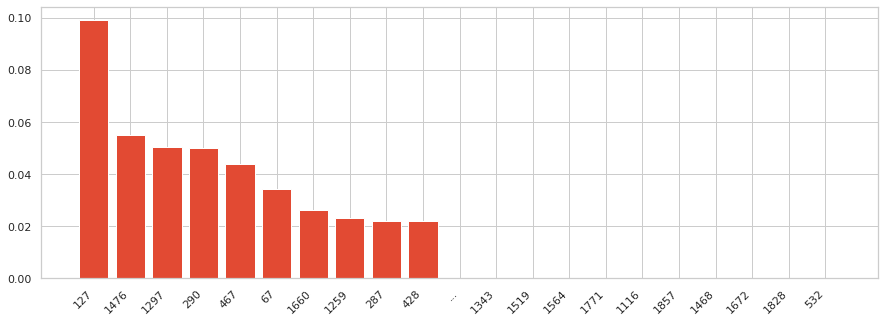

In [ ]:
betweenness_centrality = nx.betweenness_centrality(graph)
sorted_bc = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Betweenness Centrality:\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_bc[i][0])+': '+str(sorted_bc[i][1]))
print('')
print('\033[1m'+'Worst 10 Betweenness Centrality:\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_bc[i][0])+': '+str(sorted_bc[i][1]))
print('')
plot_metric_bar_chart(sorted_bc[:10]+[('...',0)]+sorted_bc[-10:])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



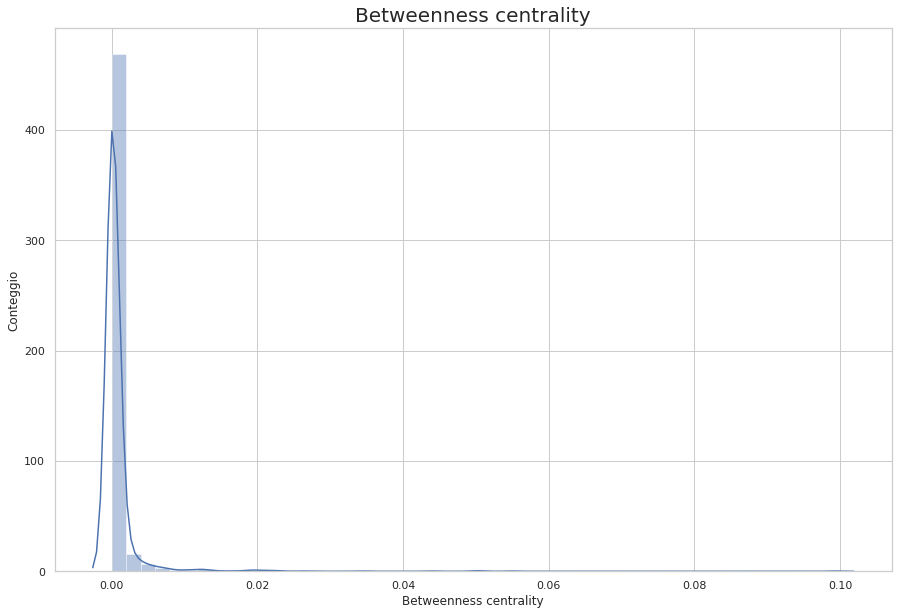

In [ ]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
plt.title('Betweenness centrality', fontsize = 20)
plt.xlabel('Betweenness centrality')
plt.ylabel('Conteggio')
sns.distplot(list(bet.values()), kde=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.



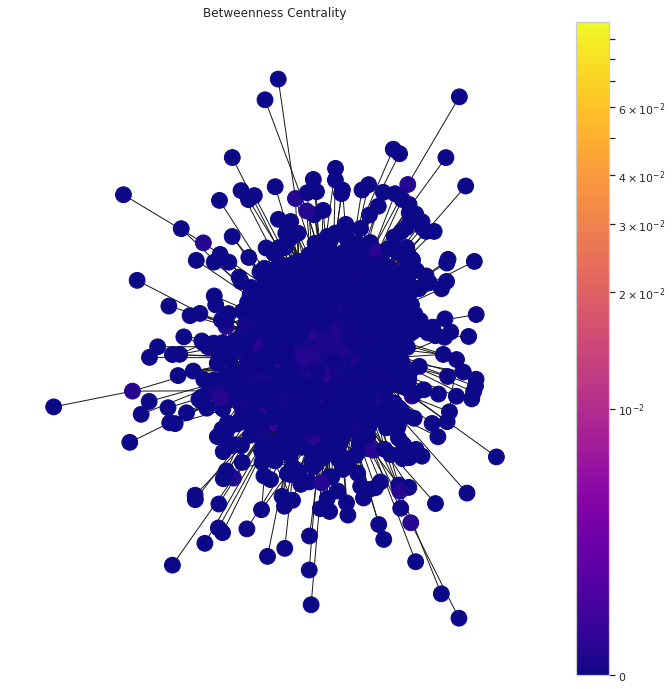

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

#### Eigenvector Centrality

Best 10 Eigenvector Centrality:

1. 127: 0.17877831012617335
2. 1297: 0.15866803272155208
3. 467: 0.15723938915542482
4. 290: 0.15150156437553058
5. 1476: 0.1457607576802338
6. 1660: 0.1337570263037189
7. 67: 0.13118052973454408
8. 1593: 0.1258976204853149
9. 1320: 0.11858724919571513
10. 1758: 0.11540890407339238

Worst 10 Eigenvector Centrality:

1. 1832: 1.7436095815676368e-07
2. 667: 2.2159017286266766e-06
3. 770: 3.387873138125768e-06
4. 196: 3.387873138125768e-06
5. 1672: 3.941131608062454e-06
6. 1794: 8.248227713411063e-06
7. 1222: 8.384965671283339e-06
8. 1044: 9.353493634091062e-06
9. 1319: 1.1200682753021389e-05
10. 464: 1.2822153199565164e-05



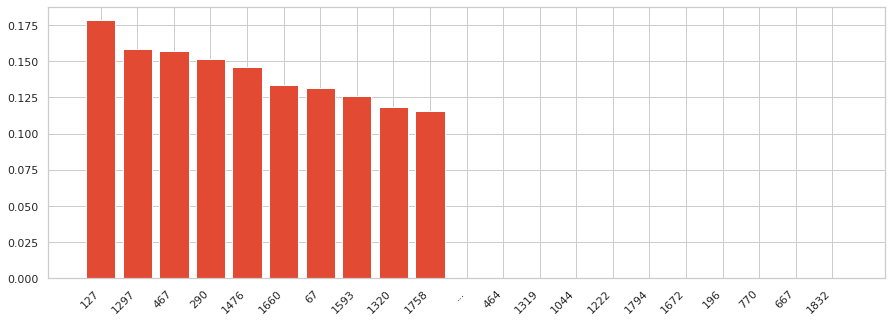

In [ ]:
eigenvector_centrality= nx.eigenvector_centrality(graph)
sorted_ec = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
print('\033[1m'+'Best 10 Eigenvector Centrality:\n'+'\033[0m')
for i in range(10):
    print(str(i+1)+'. '+str(sorted_ec[i][0])+': '+str(sorted_ec[i][1]))
print('')
print('\033[1m'+'Worst 10 Eigenvector Centrality:\n'+'\033[0m')
for i in range(-1,-11,-1):
    print(str(-i)+'. '+str(sorted_ec[i][0])+': '+str(sorted_ec[i][1]))
print('')
plot_metric_bar_chart(sorted_ec[:10]+[('...',0)]+sorted_ec[-10:])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



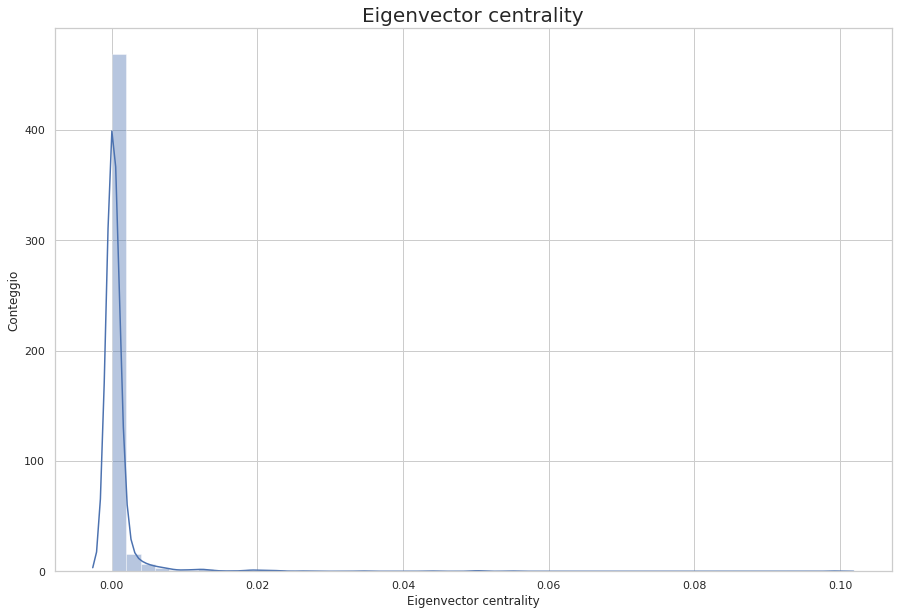

In [ ]:
eng = nx.eigenvector_centrality(graph)
plt.figure(figsize=(15,10))
plt.title('Eigenvector centrality', fontsize = 20)
plt.xlabel('Eigenvector centrality')
plt.ylabel('Conteggio')
sns.distplot(list(bet.values()), kde=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.



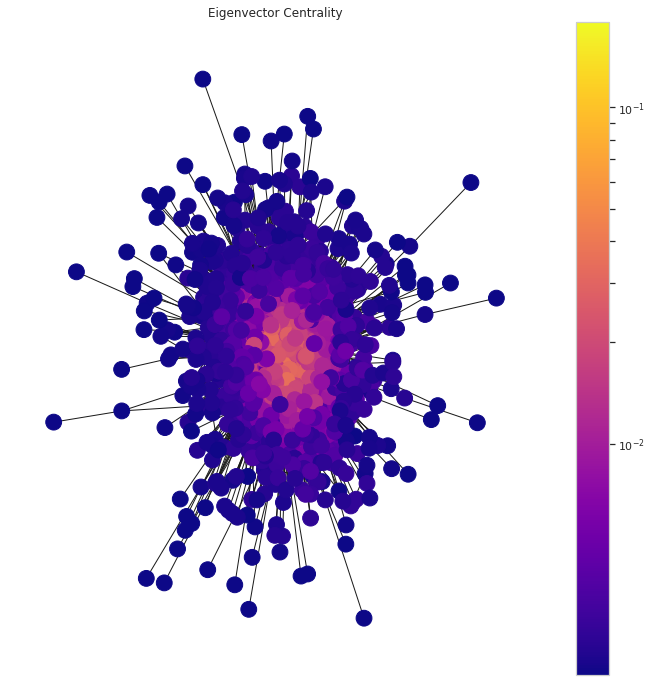

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eng, 'Eigenvector Centrality')

Nodi nella top 5 centralità

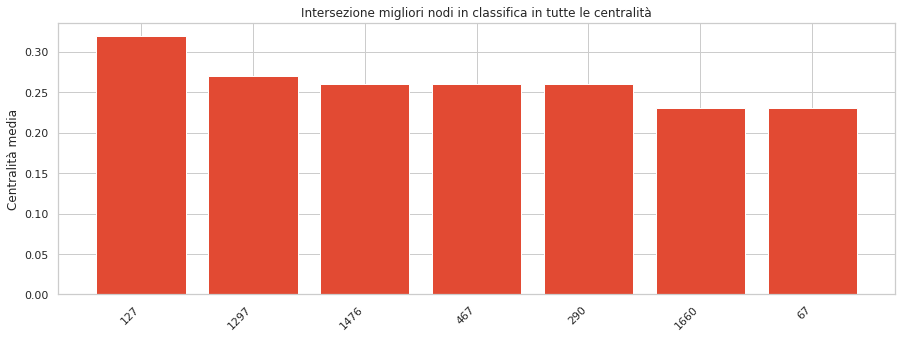

In [ ]:
top_centrality = {"127": 0.32,
                  "1297":0.27,
                  "1476" : 0.26,
                  "467" : 0.26,
                  "290" : 0.26,
                  "1660" : 0.23,
                  "67" : 0.23,

                  }

sorted_top = sorted(top_centrality.items(), key=lambda item: item[1], reverse=True)

plot_metric_bar_chart(sorted_top,title='Intersezione migliori nodi in classifica in tutte le centralità', ylabel='Centralità media')

#### Clique

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



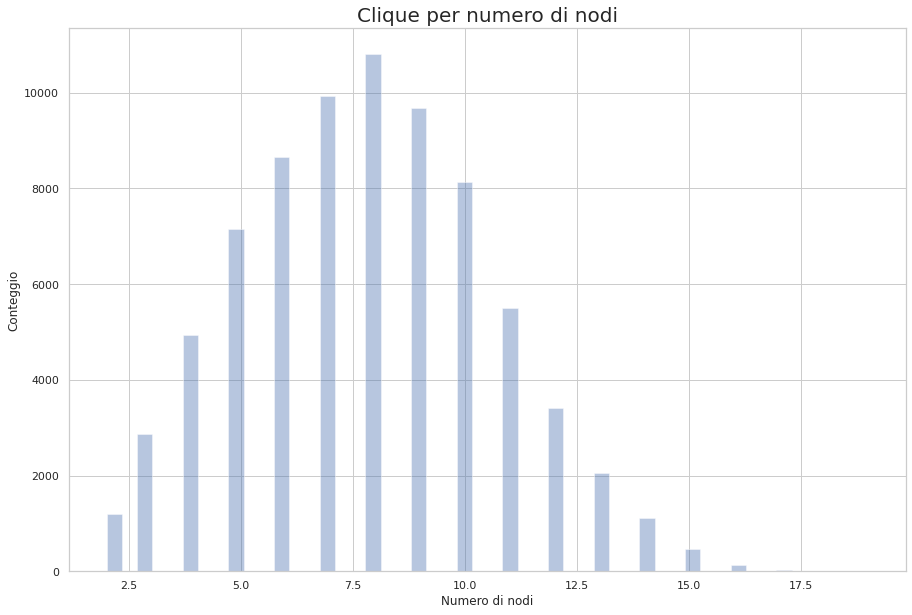

In [ ]:
# Ricerca delle cricche e distplot delle cricche per numero di nodi
cliques = nx.find_cliques(graph)
clique_elem = []
for clq in cliques:
    clique_elem.append(clq)
clique_elem.sort(key=len, reverse = True)

clique_dist = []
for i,cl in enumerate(clique_elem):
    clique_dist.append(len(clique_elem[i]))

sns.set(style = 'whitegrid')

plt.figure(figsize=(15,10))
sns.distplot(clique_dist, kde=False)
plt.title('Clique per numero di nodi', fontsize = 20)
plt.xlabel('Numero di nodi')
plt.ylabel('Conteggio')
plt.show()

In [ ]:
# Dati della clique più grande
data_cliques = []
dataset=df_edge
for i in range(0,len(dataset)):
    if ((dataset.iloc[i,0] in clique_elem[0]) and (dataset.iloc[i,1] in clique_elem[0])):
        data_cliques.append(list(dataset.iloc[i,0:3]))
for i in range(0,len(data_cliques)):
    for j in range(0,len(data_cliques[0])):
        data_cliques[i][j] = int(data_cliques[i][j])
dataframe_cliques = pd.DataFrame.from_records(data_cliques)
dataframe_cliques.columns = ['SOURCE', 'TARGET']
dataframe_cliques.head(89)

,SOURCE,TARGET
0,63,1803
1,63,237
2,63,1357
3,63,1199
4,63,309
...,...,...
84,309,1506
85,309,1208
86,309,1347
87,309,939


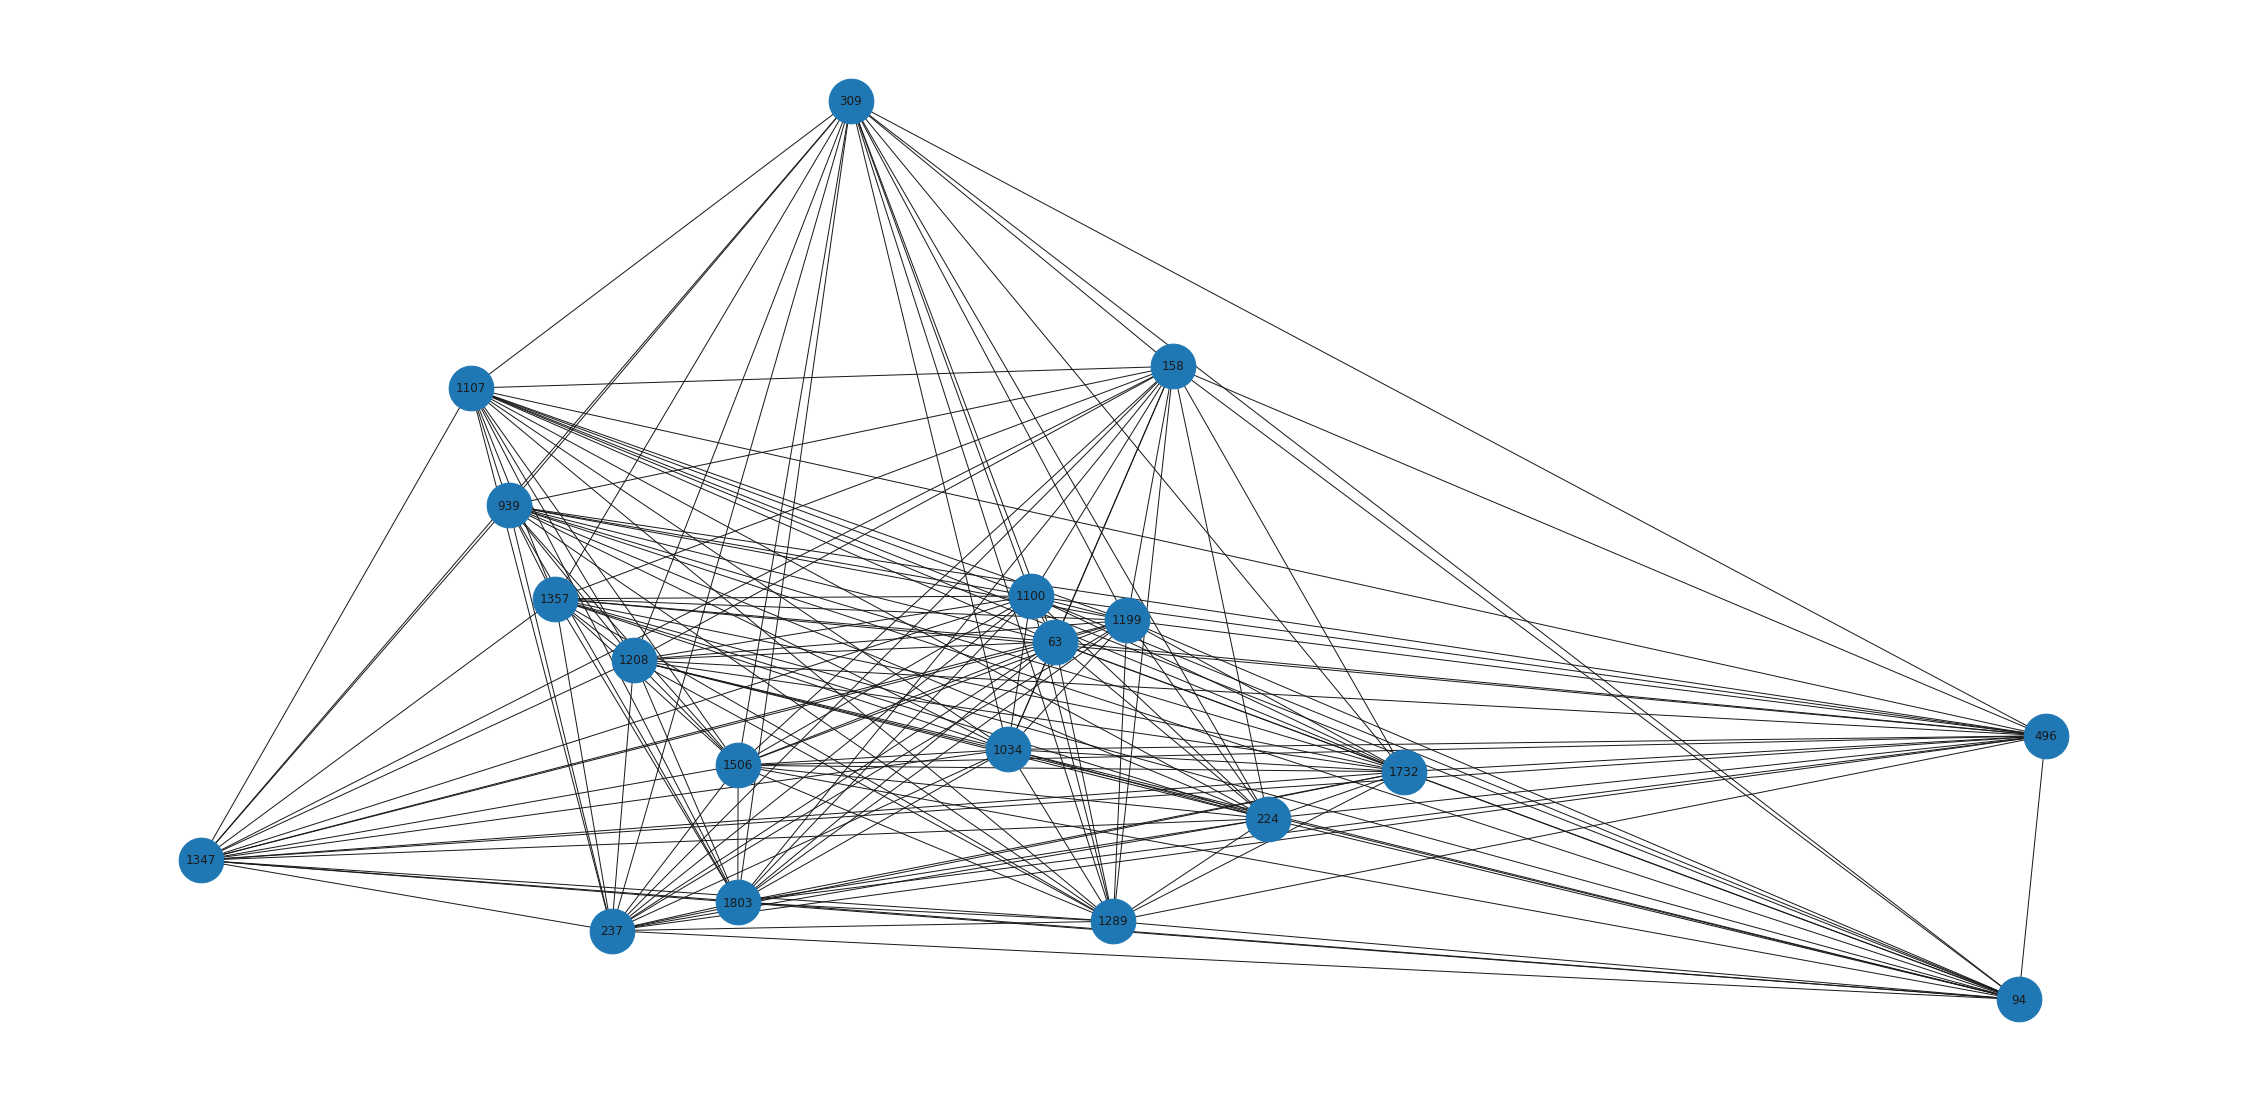

In [ ]:
# Plot della clique più grande con spring layout
cliques_edges = []
for i in range(0, len(dataframe_cliques)):
    cliques_edges.append((int(dataframe_cliques.iloc[i, 0]), int(dataframe_cliques.iloc[i, 1])))
cliques_graph = nx.Graph()
cliques_graph.add_edges_from(cliques_edges)
plt.figure(figsize=(40,20))
pos = nx.spring_layout(graph)
nx.draw_networkx(cliques_graph, pos, with_labels=True, node_size=2000)
plt.axis('off')
plt.show()

#### Community

The club has 20 communities.
COMMUNITY  0  CON  932  NODI E  11770  ARCHI:
DENSITA':  0.027129442244483066
CLUSTERING:  0.4485576329717944
COMMUNITY  1  CON  606  NODI E  7933  ARCHI:
DENSITA':  0.04327523661457055
CLUSTERING:  0.3140638827637765
COMMUNITY  2  CON  261  NODI E  1489  ARCHI:
DENSITA':  0.04388446802239906
CLUSTERING:  0.3876808575330549
COMMUNITY  3  CON  57  NODI E  87  ARCHI:
DENSITA':  0.05451127819548872
CLUSTERING:  0.25234432700107756
COMMUNITY  4  CON  14  NODI E  14  ARCHI:
DENSITA':  0.15384615384615385
CLUSTERING:  0.15
COMMUNITY  5  CON  6  NODI E  5  ARCHI:
DENSITA':  0.3333333333333333
CLUSTERING:  0.0
COMMUNITY  6  CON  5  NODI E  4  ARCHI:
DENSITA':  0.4
CLUSTERING:  0.0
COMMUNITY  7  CON  3  NODI E  2  ARCHI:
DENSITA':  0.6666666666666666
CLUSTERING:  0.0
COMMUNITY  8  CON  3  NODI E  3  ARCHI:
DENSITA':  1.0
CLUSTERING:  1.0
COMMUNITY  9  CON  3  NODI E  2  ARCHI:
DENSITA':  0.6666666666666666
CLUSTERING:  0.0
COMMUNITY  10  CON  3  NODI E  2  ARCHI:
DE

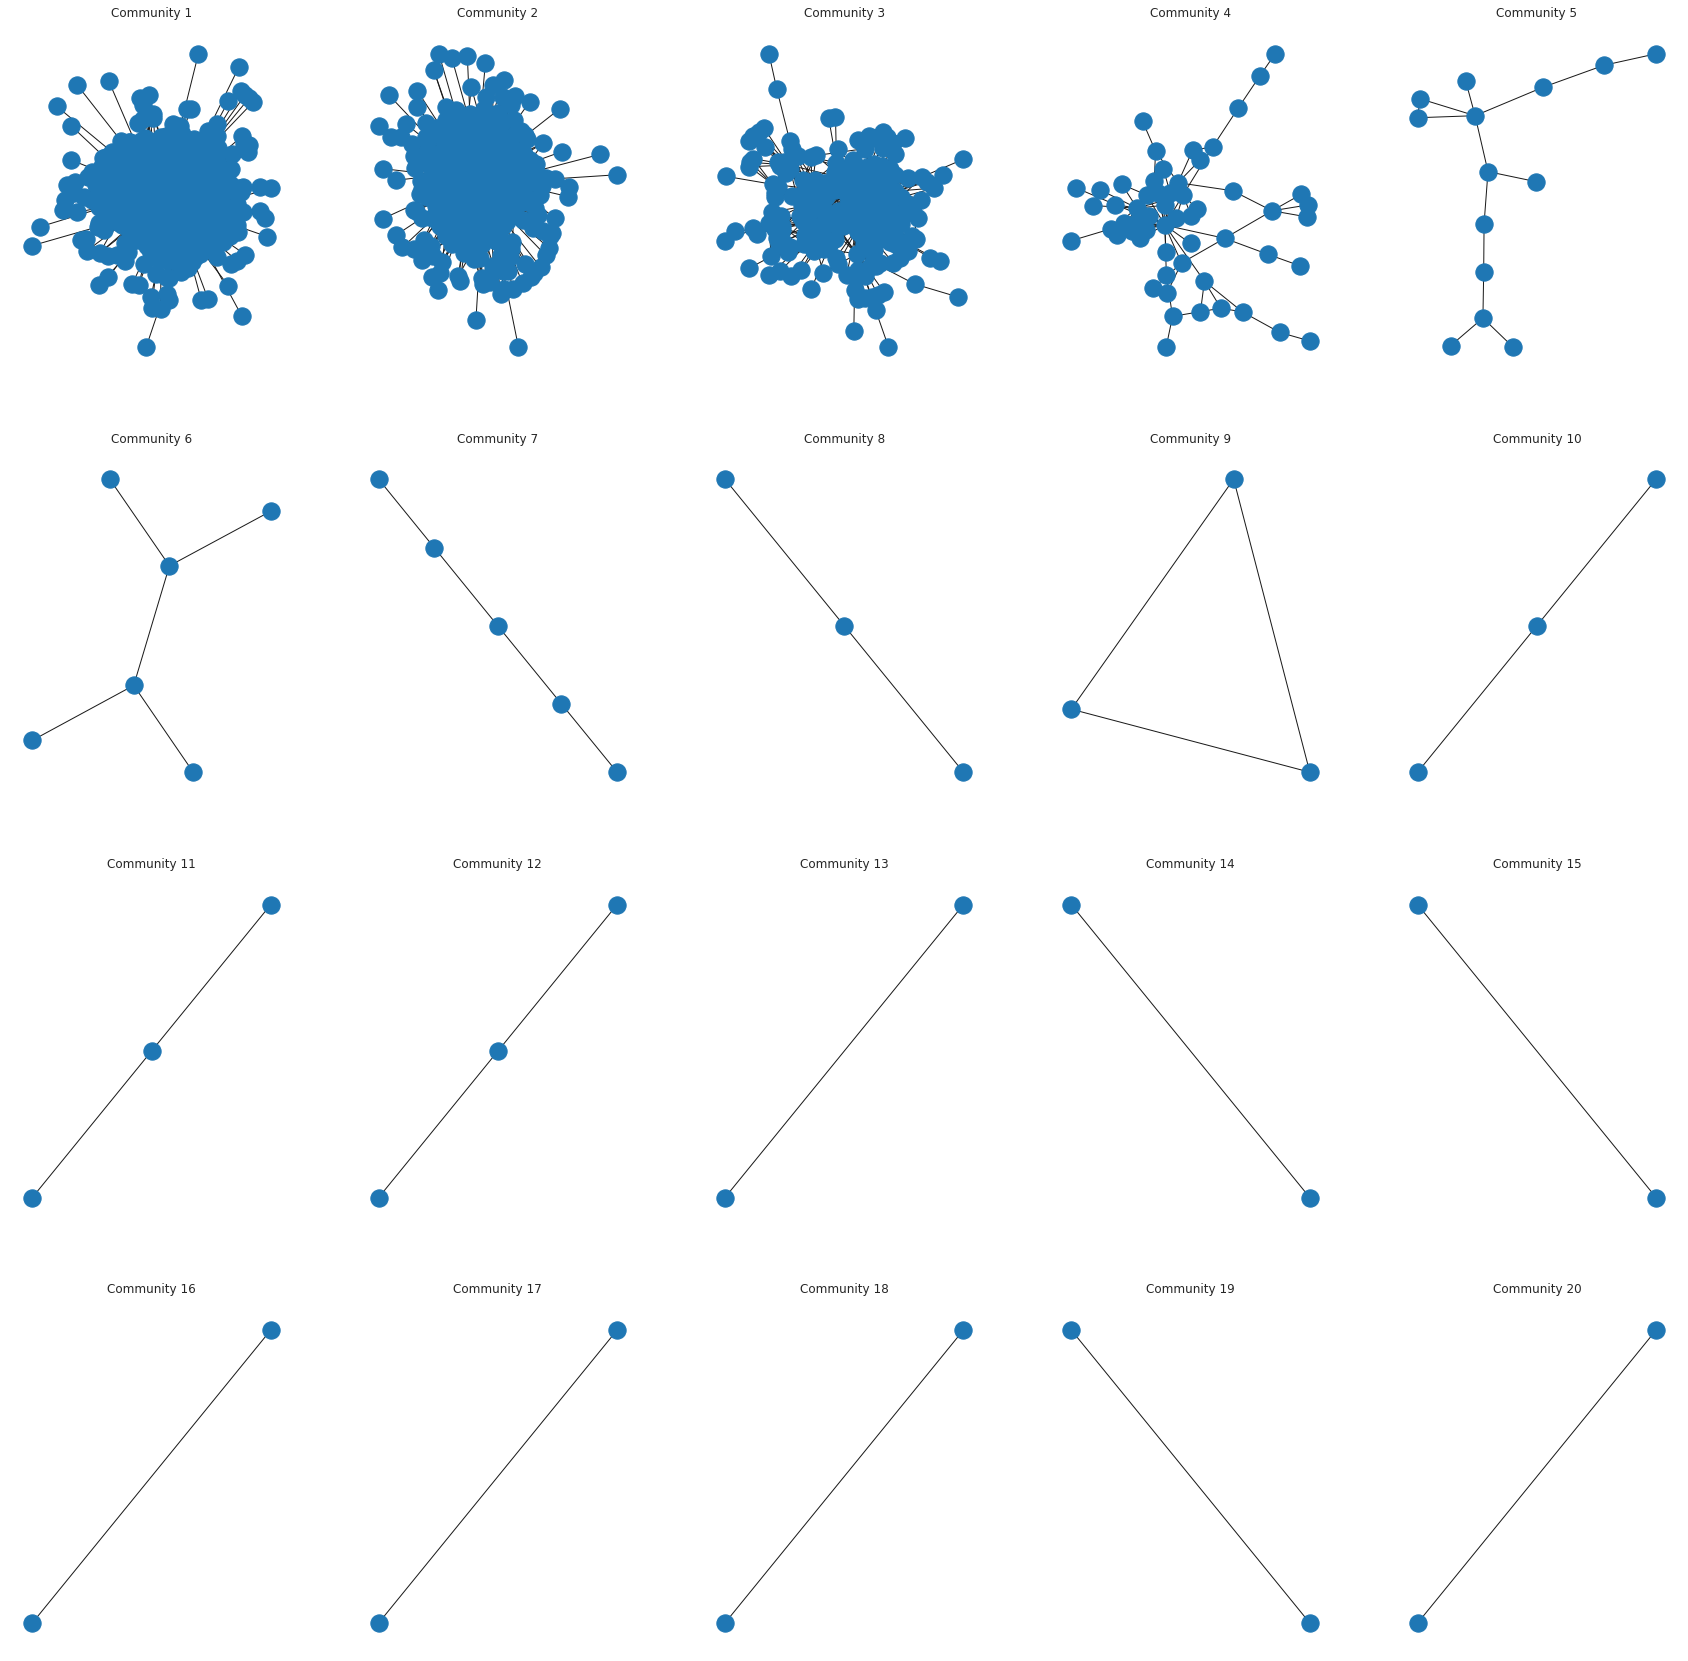

In [ ]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt

G = graph

# Find the communities
communities = sorted(nx_comm.greedy_modularity_communities(G), key=len, reverse=True)


# Count the communities
print(f"The club has {len(communities)} communities.")

'''Add community to node attributes'''
for c, v_c in enumerate(communities):
    for v in v_c:
        # Add 1 to save 0 for external edges
        G.nodes[v]['community'] = c + 1

'''Find internal edges and add their community to their attributes'''
for v, w, in G.edges:
    if G.nodes[v]['community'] == G.nodes[w]['community']:
        # Internal edge, mark with community
        G.edges[v, w]['community'] = G.nodes[v]['community']
    else:
        # External edge, mark as 0
        G.edges[v, w]['community'] = 0



N_coms=len(communities)
edges_coms=[]#edge list for each community
coms_G=[nx.Graph() for _ in range(N_coms)] #community graphs
colors=['tab:blue','tab:orange','tab:green']
fig=plt.figure(figsize=(30,30))

for i in range(N_coms):
  edges_coms.append([(u,v,d) for u,v,d in G.edges(data=True) if d['community'] == i+1])#identify edges of interest using the edge attribute
  coms_G[i].add_edges_from(edges_coms[i]) #add edges
  plt.subplot(4,5,i+1)#plot communities
  plt.title('Community '+str(i+1))
  pos = nx.spring_layout(coms_G[i])
  nx.draw(coms_G[i],pos=pos,with_labels=False,node_color=colors[0]) 
  print("COMMUNITY ", i, " CON ", len(coms_G[i].nodes), " NODI E ", len(coms_G[i].edges), " ARCHI:")
  print("DENSITA': ", nx.density(coms_G[i]))
  print("CLUSTERING: ", nx.average_clustering(coms_G[i]))

In [ ]:
plt.figure(figsize=(40,20))
pos = nx.spring_layout(coms_G[0])
nx.draw_networkx(coms_G[0], pos, with_labels=False, node_size=100)
plt.axis('off')
plt.show()